In [ ]:
################################################################################################################
#
#               DIGITAL CONTROL - EE/UFSCAR
#
#   Author: André Carmona Hernandes
#   Version: 1
#   Last-Update: 12.02.2021
#
#   Info: Function to show how Aliasing works.
#   RoadMap: Use PyQT to create a GUI interface
#
#   These codes are used in DIGITAL CONTROL classes. You may use and study by them, however use with caution!
#
################################################################################################################

from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np


def plot_signals(freq_cont=0, freq_disc=0, offset=0, points_per_cycle=100):
    if freq_cont == 0 or freq_disc == 0:
        print("\t Erro! A frequencia de aquisição ou do sinal não foi definida!")
    else:
        # 10/freq_disc to get 11 points on discrete.
        t_cont = np.linspace(0.0, 10/freq_disc, num=round((10/freq_disc)*freq_cont*points_per_cycle))
        y_cont = np.sin(2*np.pi*freq_cont*t_cont)
        t_amos = linspace(0.0, 10/freq_disc, num=11)
        y_amos = np.sin(2*np.pi*freq_cont*t_amos)
        #calculate freq aliased
        modulus = np.floor(freq_cont/(freq_disc/2))
        if modulus % 2:
            # impar
            fr = (modulus+1)*freq_disc/2 - freq_cont
            phase = np.pi
        else:
            # par
            fr = freq_cont - modulus*freq_disc/2
            phase = 0
        t_res = linspace(0.0, 10/freq_disc, num=round((10/freq_disc)*fr*points_per_cycle))
        y_res = np.sin(2 * np.pi * fr * t_res + phase) + offset
        #plots
        fig, ax = plt.subplots()
        markerline, stemlines, baseline = plt.stem(t_amos, y_amos, linefmt='blue', markerfmt='D',
                                                   basefmt='black', bottom=0.0, use_line_collection=True, label='Medidas')
        markerline.set_markerfacecolor('none')
        plt.plot(t_cont, y_cont, '-', color='0.6', label="sinal", linewidth=2.0)
        plt.plot(t_res, y_res, ':', color=(0, 0, 0.6, 1), label="reconstrução", linewidth=2.0)
        plt.xlabel('Tempo [s]')
        plt.ylabel('Amplitude')
        legend = ax.legend(loc='best', shadow=True, fontsize='x-large')
        plt.show()



def print_menu():
    print("\t As Opções são: ")
    print("[1] - Defina a frequencia do sinal contínuo [em Hz]")
    print("[2] - Defina a frequencia de amostragem [em Hz]")
    print("[3] - Defina o offset entre o gráfico do sinal continuo e o reconstruído pela amostragem")
    print("[4] - Rode a comparação")
    print("[5] - Sair")


print('\t\t\t Bem vindo! Este programa faz análises de aliasing ou sub-amostragem.')
print('\t\t Este programa mostra um sinal seno continuo, e os efeitos da amostragem.\n')

fc = 0
fd = 0
of = 0

print_menu()
x = input()
option = int(x)

while option != 5:
    if option == 1:
        print("Digite a frequencia do sinal contínuo [em Hz]")
        fc = float(input())
    elif option == 2:
        print("Digite a frequencia de amostragem [em Hz]")
        fd = float(input())
    elif option == 3:
        print("Digite o offset")
        of = float(input())
    elif option == 4:
        print("Rodando ...")
        plot_signals(freq_cont=fc, freq_disc=fd, offset=of)
    else:
        print("Escolha a opção correta!")
    print_menu()
    x = input()
    option = int(x)


# Fs = 1 Hz/ Famos = 10Hz

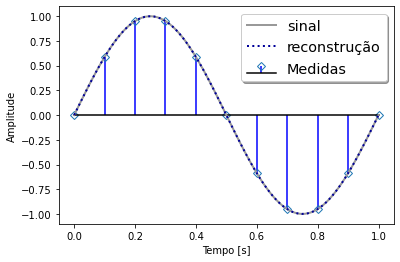

# Fs =  Hz/ Famos = 10Hz

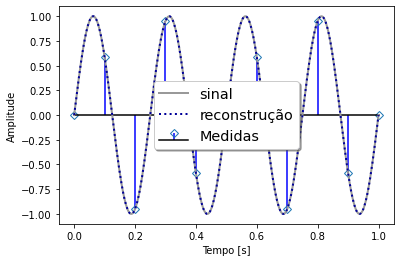